## CHAPTER 7 -  BOX PLOTS  FOR DATA ANALYSIS

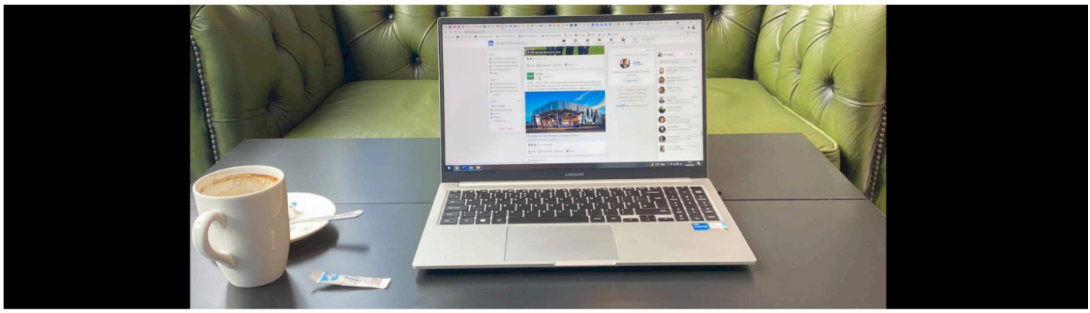

#### HEMANT THAPA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf
import math as mt
import statistics as st
import scipy.stats as stats
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("error")

from scipy.stats import norm

### INTRODUCTION 

In this report, we present a comprehensive analysis of a dataset containing information about credit card customers. The dataset consists of 400 rows, each representing a unique customer, and several columns providing various attributes about these customers. Our goal is to extract meaningful insights from this data to better understand the characteristics of these customers.

#### STEP 1 : LOADING DATASET

In [2]:
#loading customer dataset
df = pd.read_csv('balance.txt',sep=' ')

In [3]:
#The head() function shows the first five observations. 
#You can see the columns and the type of data in the columns.
df.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,23.283334,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,22.530409,104.593,7075,514,4,71,11,Male,No,No,Asian
3,27.652811,148.924,9504,681,3,36,11,Female,No,No,Asian
4,16.893978,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian


In [4]:
#This shows the last observations of the dataset
df.tail()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
395,8.764984,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian
396,9.943838,13.364,3838,296,5,65,17,Male,No,No,African American
397,14.882078,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian
398,12.001071,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian
399,10.159598,18.701,5524,415,5,64,7,Female,No,No,Asian


#### STEP 2 : FIND ERRORS OR MISSING VALUES

In [5]:
df.isnull().any() #finding error or missing values

Balance      False
Income       False
Limit        False
Rating       False
Cards        False
Age          False
Education    False
Gender       False
Student      False
Married      False
Ethnicity    False
dtype: bool

In [6]:
df.isnull().sum()

Balance      0
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
dtype: int64

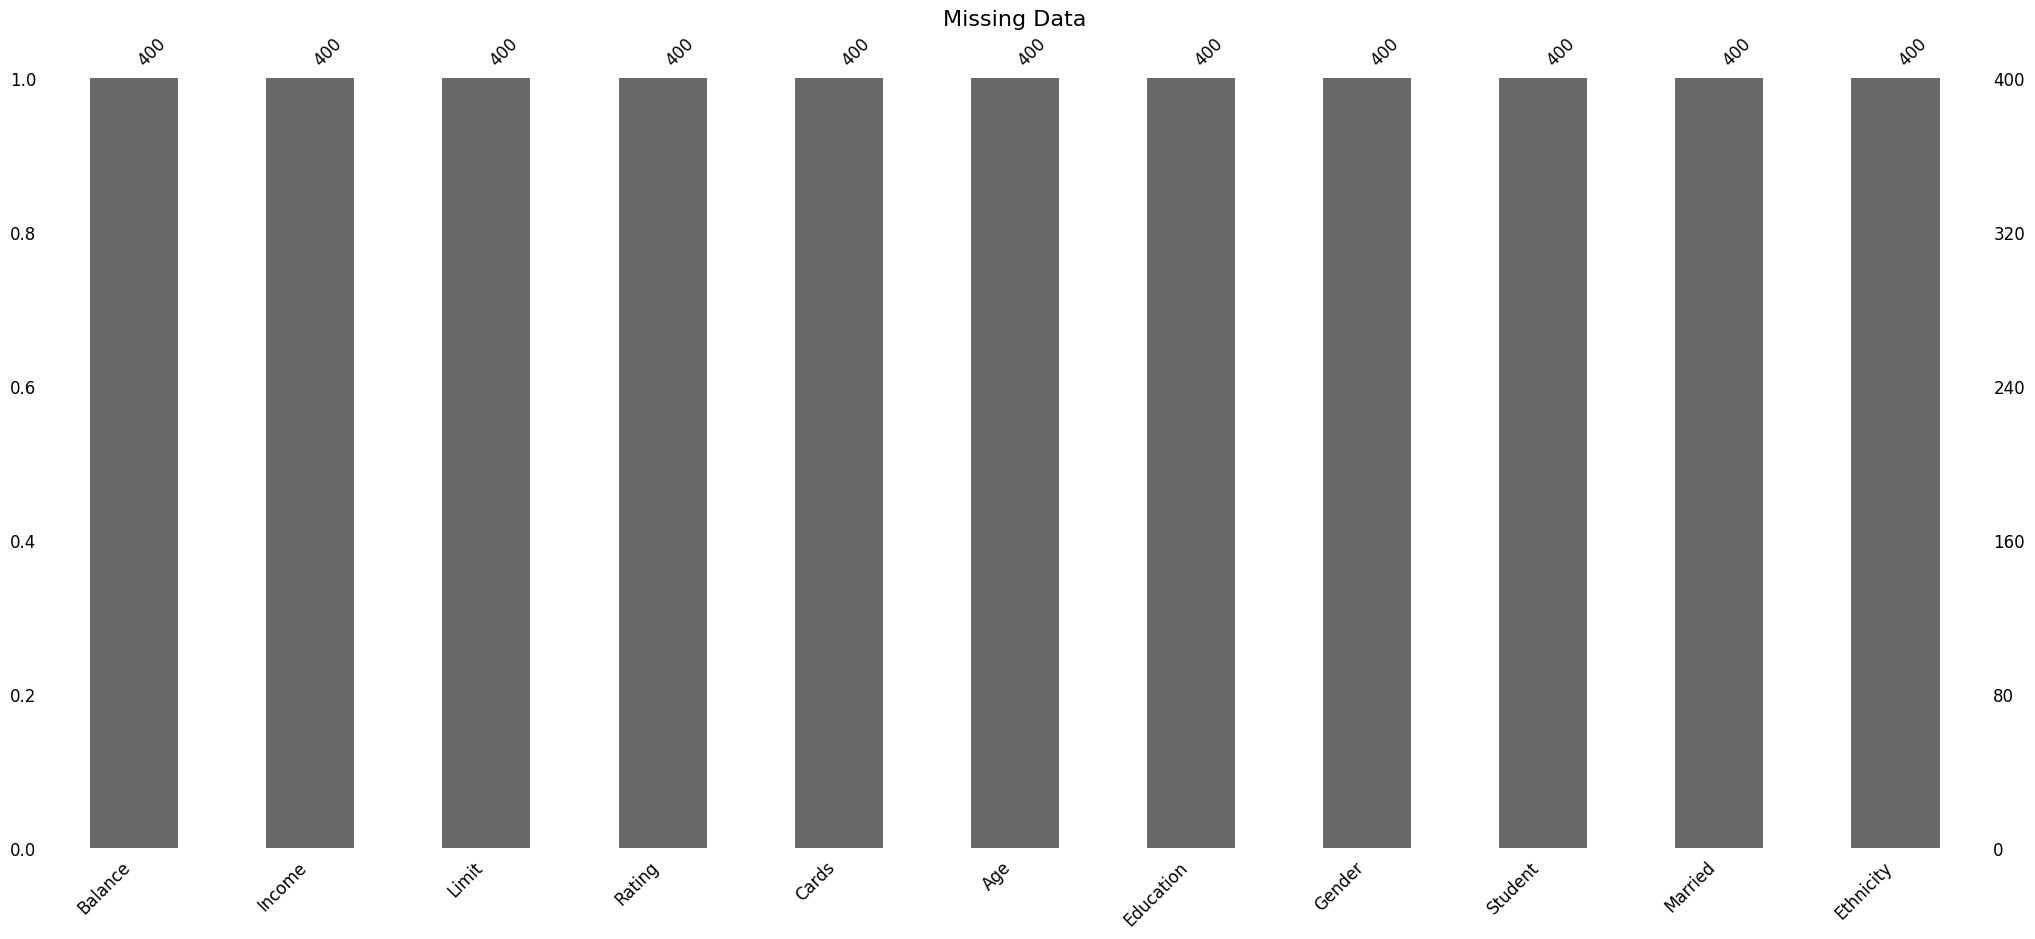

In [7]:
msno.bar(df, fontsize=12, labels=True)
plt.title('Missing Data', fontsize=16)
plt.xticks(rotation=45)
plt.show()

There are no missing or null values in the dataset. Each column, represented by the variable names Balance, Income, Limit, Rating, Cards, Age, Education, Gender, Student, Married, and Ethnicity, contains complete and valid data. This suggests that the dataset is clean and ready for analysis without the need for imputation or data cleaning procedures.

In [8]:
#Inspecting overall dataset
findcolumns=df.columns
for word in findcolumns:
    print("\033[1m column %s unique values are : \n"% word,df[word].unique(),"\n","-------")

 column Balance unique values are : 
 [12.24079848 23.28333392 22.53040888 27.65281071 16.89397849 22.48617761
 10.57451644 14.57620435  7.9380903  17.75696487 13.99498953  9.46730771
 19.21880032 10.69898374  9.89353297 10.04512813 15.24877195 12.96088475
 11.57377805 13.23624893  9.85310041 13.59577602  9.41650944 16.30253342
  6.16094815  8.23251395 14.95991554 12.60846077 35.2710115  14.00776959
 10.20152348 11.46486408 26.03941606 10.05131528  9.25014452 10.2460781
 16.87621918 11.12620322  8.51728207  7.62376227 12.02964599 25.29100796
 13.1236689  12.31997614 12.05959563 18.65366124 10.80582469 11.48856524
 13.43346836 14.00763253 10.1073556  13.01076763 11.92434223  9.72819204
  7.66566199 11.4543372  17.05369062 18.15548849  9.18079694 16.42409471
 13.29728253 10.03231624 10.98723639  9.52966275 10.88325562  7.82543588
 22.78102775  7.82361468 10.73817573 14.14508391  9.05880571 15.2755303
  4.99577443 11.66506263  7.70287406 12.86976875 10.38747181 11.52386258
 20.73084824  9

In [9]:
#Checking data types
df.dtypes

Balance      float64
Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
dtype: object

In [10]:
#By using the index function below, we know the range of the dataset is from 0-400.
df.index

RangeIndex(start=0, stop=400, step=1)

In [11]:
# This allows you to see the columns in the data frame.
df.columns

Index(['Balance', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity'],
      dtype='object')

### STEP 3 : DATA ANALYSIS 

#### SUMMARY STATISTICS FOR KEY VARIABLES

#### The following table summarizes key statistics for the dataset across seven numerical variables:

In [12]:
#A quick statistic summary of your data. As you can see, the statistic is calculated for only columns with numerical values.
df.describe()

,Balance,Income,Limit,Rating,Cards,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,13.429175,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000
std,5.669256,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207
min,3.749403,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000
25%,9.891439,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000
50%,11.779615,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000
75%,15.236961,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000
max,38.785123,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000


#### Key Observations:

1. Balance: The average balance among customers is approximately 13.43 units, with a standard deviation of 5.67 units. Balances vary from a minimum of 3.75 units to a maximum of 38.79 units.

2. Income: The average income of customers is approximately 45.22 units, with a standard deviation of 35.24 units. Incomes range from a minimum of 10.35 units to a maximum of 186.63 units.

3. Limit: Customers have an average credit limit of 4,735.60 units, with a standard deviation of 2,308.20 units. Credit limits range from a minimum of 855 units to a maximum of 13,913 units.

4. Rating: The average credit rating of customers is approximately 354.94 units, with a standard deviation of 154.72 units. Ratings range from a minimum of 93 units to a maximum of 982 units.

5. Cards: On average, customers have nearly 3 credit cards, with a minimum of 1 card and a maximum of 9 cards.

6. Age: The average age of customers is 55.67 years, with a standard deviation of 17.25 years. Customer ages range from 23 to 98 years.

7. Education: The average education level is 13.45 years, with a standard deviation of 3.13 years. Education levels vary from a minimum of 5 years to a maximum of 20 years.

#### Top ten customer with higest income in dataset.

In [13]:
#sorting observation with top highest income in dataset 
df.sort_values(by='Income',ascending=False)[:10]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
28,35.271011,186.634,13414,949,2,41,14,Female,No,Yes,African American
323,33.745580,182.728,13913,982,4,98,17,Male,No,Yes,Caucasian
355,34.034656,180.682,11966,832,2,58,8,Female,No,Yes,African American
261,38.785123,180.379,9310,665,3,67,8,Female,Yes,Yes,Asian
275,30.212080,163.329,8732,636,3,50,14,Male,No,Yes,Caucasian
347,32.155557,160.231,10748,754,2,69,17,Male,No,No,Caucasian
184,27.976421,158.889,11589,805,1,62,17,Female,No,Yes,Caucasian
85,29.370645,152.298,12066,828,4,41,12,Female,No,Yes,Asian
209,28.142850,151.947,9156,642,2,91,11,Female,No,Yes,African American
339,30.355899,149.316,10278,707,1,80,16,Male,No,No,African American


1. Diverse Demographics: The selected customer profiles reflect a diverse range of demographics, including different genders, ages, and ethnicities. This diversity highlights the inclusivity of the credit card customer base.

2. Education Levels Vary: The education levels among these customers vary, with some having completed as many as 17 years of education and others having completed 8 years. This suggests a wide range of educational backgrounds and potential career stages.

3. Financial Responsibility: Customers in this subset exhibit varying levels of financial responsibility, as indicated by their credit card balances, incomes, and credit limits. For example, Customer 4 maintains a high balance, indicating responsible credit use, while Customer 7 has a relatively low balance.

4. Marital Status: A majority of these customers are married, but there is also a representation of single customers. Understanding the marital status of customers can help tailor financial products and services to their specific needs.

5. No Student Status: None of the selected customers are students, suggesting that they may be primarily working professionals or retirees. This information can be valuable for marketing and product targeting.

6. High Credit Rating: Some customers have notably high credit ratings, such as Customer 2 with a rating of 982. High credit ratings can be indicative of responsible financial behavior.

7. Varied Number of Cards: The number of credit cards owned by these customers varies, with some having only one card and others having up to four cards. This indicates different preferences for managing credit.

8. Income Disparity: There is a significant income disparity among these customers, with incomes ranging from around 150 units to nearly 190 units. Such disparities underscore the importance of offering a range of credit card options to cater to different income levels.

9. Loyal Customers: The fact that these customers are part of this subset suggests that they have been loyal to the bank or credit card issuer for some time. Building and maintaining customer loyalty is crucial in the competitive credit card industry.

10. Potential for Personalized Services: By understanding these customer profiles in more detail, financial institutions can tailor their services and marketing efforts to better meet the unique financial needs and preferences of each customer.

In [14]:
df[:10]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian
1,23.283334,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian
2,22.530409,104.593,7075,514,4,71,11,Male,No,No,Asian
3,27.652811,148.924,9504,681,3,36,11,Female,No,No,Asian
4,16.893978,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian
5,22.486178,80.180,8047,569,4,77,10,Male,No,No,Caucasian
6,10.574516,20.996,3388,259,2,37,12,Female,No,No,African American
7,14.576204,71.408,7114,512,2,87,9,Male,No,No,Asian
8,7.938090,15.125,3300,266,5,66,13,Female,No,No,Caucasian
9,17.756965,71.061,6819,491,3,41,19,Female,Yes,Yes,African American


The purpose of creating histograms and bell curves (probability density functions) for data is to visualize the distribution of the data and assess its characteristics. 

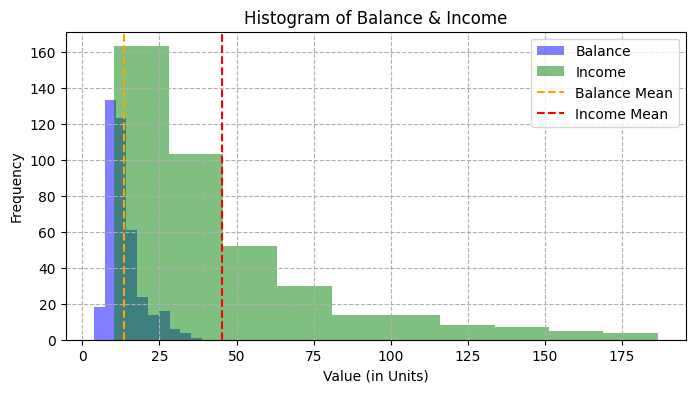

In [15]:
#histogram for Balance and Income
plt.figure(figsize=(8, 4))
plt.hist(df['Balance'], label='Balance', alpha=0.5, bins=10, color='blue')
plt.hist(df['Income'], label='Income', alpha=0.5, bins=10, color='green')
plt.axvline(df['Balance'].mean(), label='Balance Mean', ls='--', color='orange')
plt.axvline(df['Income'].mean(), label='Income Mean', ls='--', color='red')
plt.title('Histogram of Balance & Income')
plt.xlabel('Value (in Units)') 
plt.ylabel('Frequency')
plt.grid(True, ls='--')
plt.legend()
plt.show()

#### CALCULATING QUARTILE FOR VALIDATING DATA SKEWNESS.

#### <font color = blue> 1. Data Distribution <font>

Skewness provides insights into the shape of the data distribution. It helps you understand whether the data is symmetric or asymmetric, and the direction of the asymmetry (left or right skew). 

In [16]:
mean_balance = df['Balance'].mean()
mean_income = df['Income'].mean()

median_balance = df['Balance'].median()
median_income = df['Income'].median()

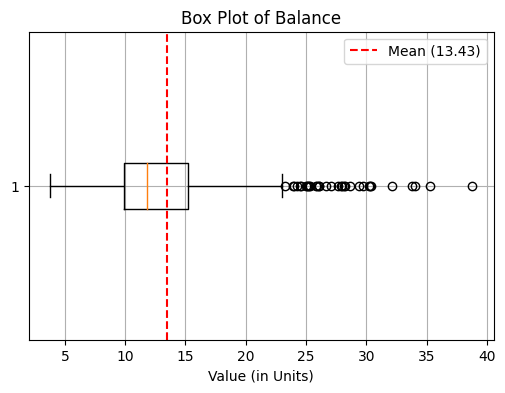

In [17]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Balance'], vert=False)  
plt.axvline(mean_balance, color='red', linestyle='--', label=f'Mean ({mean_balance:.2f})')
plt.title('Box Plot of Balance')
plt.xlabel('Value (in Units)')
plt.grid(True)
plt.legend()
plt.show()

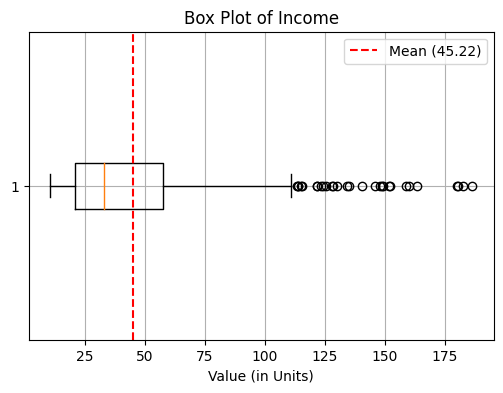

In [18]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Income'], vert=False)  
plt.axvline(mean_income, color='red', linestyle='--', label=f'Mean ({mean_income:.2f})')
plt.title('Box Plot of Income')
plt.xlabel('Value (in Units)')
plt.grid(True)
plt.legend()
plt.show()

Our Balance and Income data is positive or right skew because median toward bottom of data, where Median < Mean. Upper quartile is larger than lower quartile. 

#### <font color = blue> 2. Central Tendency <font>

 Skewness impacts measures of central tendency. In positively skewed data, the mean is typically greater than the median, and in negatively skewed data, the mean is typically less than the median. 

In [19]:
print(f'Mean Balane :{mean_balance}')
print(f'Median Balane :{median_balance}')
print()
print(f'Mean Income :{mean_income}')
print(f'Median Income :{median_income}')

Mean Balane :13.429174748332603
Median Balane :11.7796145580453

Mean Income :45.218885
Median Income :33.1155


##### Balance variable:

1. The mean balance is approximately 13.43 units.

3. The median balance (Q2) is approximately 11.78 units.

Since the mean is greater than the median, it indicates that the "Balance" data is positively skewed. In positively skewed data, the tail on the right side (larger values) is longer, which pulls the mean to the right of the median.

#### Income variable:

1. The mean income is approximately 45.22 units.
   
2. The median income (Q2) is approximately 33.12 units.
   
Similar to the "Balance" data, the mean is greater than the median for "Income," suggesting positive skewness.

 #### <font color = blue> 3. Skewness by comparing quartile ranges (IQR) around the median. <font>

When Q3−Q2 is greater than Q2−Q1, it suggests that the right tail is longer, indicating positive skewness.¶

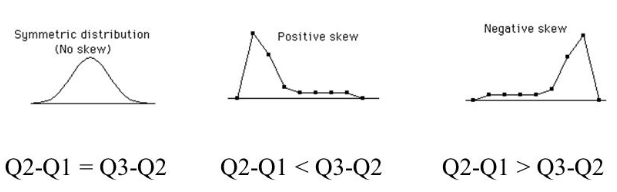

In [20]:
q1_balance, q2_balance, q3_balance, q4_balance = np.percentile(df['Balance'], [25, 50, 75, 100])

In [21]:
print(f'Q1 Balance (25th percentile): {q1_balance}')
print(f'Q2 Balance (50th percentile, Median): {q2_balance}')
print(f'Q3 Balance (75th percentile): {q3_balance}')
print(f'Q4 Balance (100th percentile, Max): {q4_balance}')

Q1 Balance (25th percentile): 9.89143859287277
Q2 Balance (50th percentile, Median): 11.7796145580453
Q3 Balance (75th percentile): 15.236961180383625
Q4 Balance (100th percentile, Max): 38.7851230052754


In [22]:
if (q3_balance - q2_balance) > (q2_balance - q1_balance):
    print("Positive skew")
else:
    print("Not positive skew")

Positive skew


In [23]:
q1_income, q2_income, q3_income, q4_income = np.percentile(df['Income'], [25, 50, 75, 100])

In [24]:
print(f'Q1 Income (25th percentile): {q1_income}')
print(f'Q2 Income (50th percentile, Median): {q2_income}')
print(f'Q3 Income (75th percentile): {q3_balance}')
print(f'Q4 Income (100th percentile, Max): {q4_income}')

Q1 Income (25th percentile): 21.00725
Q2 Income (50th percentile, Median): 33.1155
Q3 Income (75th percentile): 15.236961180383625
Q4 Income (100th percentile, Max): 186.634


In [25]:
if (q3_income - q2_income) > (q2_income - q1_income):
    print("Positive skew")
else:
    print("Not positive skew")

Positive skew


#### <font color = blue> 4. Pearson’s median skewness. <font>

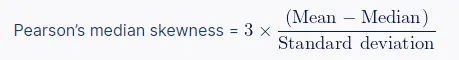

In [26]:
class BalanceSkewness:
    """
    Class for calculating and interpreting skewness of a data column.
    
    Parameters:
    - data: DataFrame containing the data.
    - column_name: Name of the column for which skewness will be calculated.
    
    Note: If this value is between:
    · -0.5 and 0.5, the distribution of the value is almost symmetrical
    · -1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed.
    · If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.
    """
    def __init__(self, data, column_name):
        self.data = data
        self.column_name = column_name
        
    def calculate_skewness(self):
        # Calculate skewness using Pearson’s median skewness formula
        mean = self.data[self.column_name].mean()
        median = self.data[self.column_name].median()
        mode = self.data[self.column_name].mode().iloc[0]  # Get the first mode if it exists
        
        # Calculate skewness using the Pearson's median formula
        pearson_skewness = (3 * (mean - median)) / self.data[self.column_name].std()
        
        print("Pearson's median skewness:", pearson_skewness)
        
        return pearson_skewness

    def interpret_skewness(self, skewness_value):
        # Interpret the skewness based on your conditions
        if skewness_value > 1:
            skewness_result = "Highly positively skewed"
        elif 0.5 <= skewness_value <= 1:
            skewness_result = "Positively skewed"
        elif skewness_value < -1:
            skewness_result = "Highly negatively skewed"
        elif -1 <= skewness_value <= -0.5:
            skewness_result = "Negatively skewed"
        else:
            skewness_result = "No skew (symmetric distribution)"
        
        print("Interpretation of skewness:", skewness_result)
        
        return skewness_result

    def analyze_skewness(self):
        # Calculate skewness using Pearson's median skewness formula
        pearson_skewness = self.calculate_skewness()

        # Interpret the skewness
        skewness_result = self.interpret_skewness(pearson_skewness)

        print("Skewness of '{}':".format(self.column_name), skewness_result)

In [27]:
skewness_calculator = BalanceSkewness(df, 'Balance')
skewness_calculator.analyze_skewness()

Pearson's median skewness: 0.8728976895224874
Interpretation of skewness: Positively skewed
Skewness of 'Balance': Positively skewed


In [28]:
# help(BalanceSkewness)

#### <font color = blue> 5. probability distribution functions (PDF) of a normal distribution. <font>

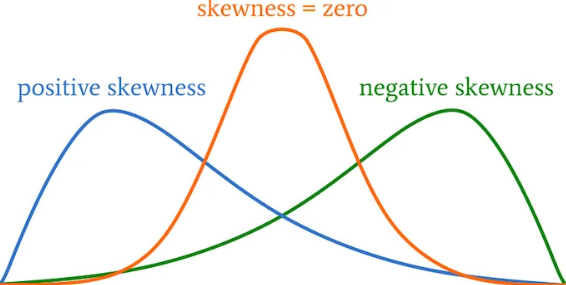

In [29]:
#calculating probability distribution functions (PDF) of a normal distribution.
#Balance
mu_balance, sigma_balance = norm.fit(df['Balance'])
x_balance = np.linspace(min(df['Balance']), max(df['Balance']), 100)
pdf_balance = stats.norm.pdf(x_balance, mu_balance, sigma_balance)
#Income
mu_income, sigma_income = norm.fit(df['Income'])
x_income = np.linspace(min(df['Income']), max(df['Income']), 100)
pdf_income = norm.pdf(x_income, mu_income, sigma_income)

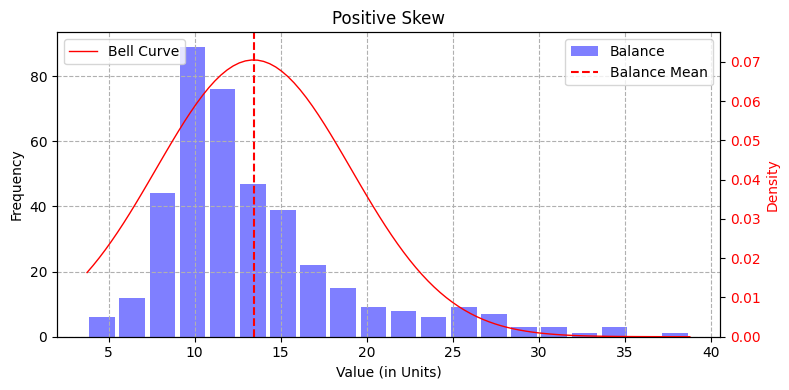

In [30]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.hist(df['Balance'], bins=20, color='blue', alpha=0.5, rwidth=0.85, label='Balance')
plt.axvline(df['Balance'].mean(), label='Balance Mean', ls='--', color='red')
plt.xlabel('Value (in Units)') 
plt.ylabel('Frequency')
plt.grid(True, ls='--')
plt.legend()

ax1.set_title('Positive Skew')
ax2 = ax1.twinx()
ax2.plot(x_balance, pdf_balance, 'r-', lw=1, label='Bell Curve')
ax2.set_ylabel('Density', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(pdf_balance) * 1.1)  
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()

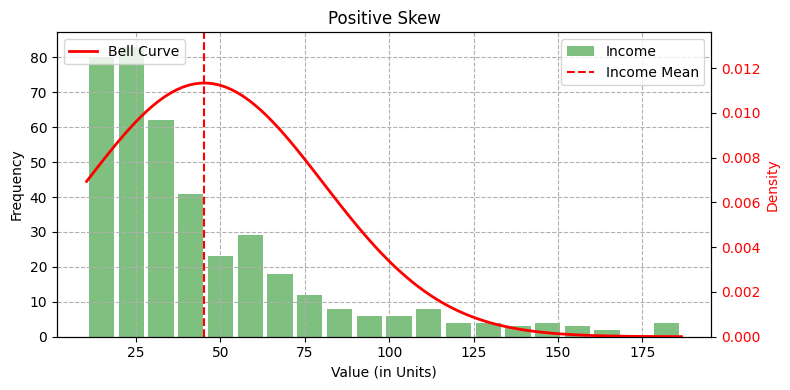

In [31]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.hist(df['Income'], bins=20, color='green', alpha=0.5, rwidth=0.85, label='Income')
plt.axvline(df['Income'].mean(), label='Income Mean', ls='--', color='red')
plt.xlabel('Value (in Units)')
plt.ylabel('Frequency')
plt.grid(True, ls='--')
plt.legend()
ax1.set_title('Positive Skew')
ax2 = ax1.twinx()

ax2.plot(x_income, pdf_income, 'r-', lw=2, label='Bell Curve')
ax2.set_ylabel('Density', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(pdf_income) * 1.2) 
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()

This means that there are some data points that are far from the average, but they don't occur very often. In a right-skewed distribution, you'll see a long tail on the right side because the values on that side are stretched out, making the distribution lean to the right.

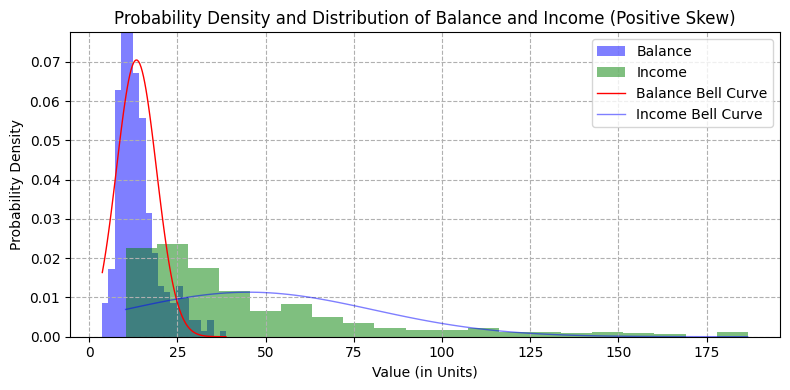

In [32]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df['Balance'], bins=20, color='blue', alpha=0.5, label='Balance', density=True)
ax.hist(df['Income'], bins=20, color='green', alpha=0.5, label='Income', density=True)

ax.plot(x_balance, pdf_balance, 'r-', lw=1, label='Balance Bell Curve')
ax.plot(x_income, pdf_income, 'b-', lw=1, label='Income Bell Curve', alpha=0.5)

ax.set_xlabel('Value (in Units)')
ax.set_ylabel('Probability Density')
ax.set_title('Probability Density and Distribution of Balance and Income (Positive Skew)')
plt.grid(True, ls='--')
ax.legend()
ax.set_ylim(0, max(max(pdf_balance), max(pdf_income)) * 1.1)
plt.tight_layout()
plt.show()

In [33]:
def identify_outliers(df, column_name):
    # Calculate the quartiles (Q1 and Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers in the specified column
    #Identify outliers as the data points that fall below the lower bound or above the upper bound in the specified column.
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

In [34]:
outliers_balance = identify_outliers(df, 'Balance')
print("Outliers in 'Balance' data:")
print(outliers_balance)

Outliers in 'Balance' data:
       Balance   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
1    23.283334  106.025   6645     483      3   82         15  Female     Yes   
3    27.652811  148.924   9504     681      3   36         11  Female      No   
28   35.271011  186.634  13414     949      2   41         14  Female      No   
32   26.039416  134.181   7838     563      2   48         13  Female      No   
41   25.291008  113.659   7659     538      2   66         15    Male     Yes   
85   29.370645  152.298  12066     828      4   41         12  Female      No   
102  24.484453   68.713   7582     531      2   56         16    Male     Yes   
103  29.707090  146.183   9540     682      6   66         15    Male      No   
121  30.261986  148.080   8157     599      2   83         13    Male      No   
128  26.032985  123.299   8376     610      2   89         17    Male     Yes   
139  25.034753  107.841  10384     728      3   87          7    Male      No   


Now we gonna check outlier with the help of box plot. 

1. Clear Visualization: Boxplots present data in a concise and easy-to-understand format. They consist of a rectangular "box" that represents the interquartile range (IQR) of the data, and "whiskers" extending from the box to indicate the range of the data. Any data points beyond the whiskers are considered potential outliers.

2. Identifying Skewness: By observing the length of the whiskers and the position of the median within the box, you can quickly identify whether the data is skewed to one side or symmetrically distributed. Outliers can significantly affect the skewness of the data, making it an essential tool to assess the impact of outliers on the distribution.

3. Outlier Detection: Boxplots explicitly highlight potential outliers as individual data points lying beyond the whiskers. Outliers are often defined as values that are significantly different from the majority of the data. Boxplots make it easy to spot these extreme values.

4. Robustness to Extreme Values: Unlike some other statistical measures like the mean and standard deviation, boxplots are resistant to the influence of extreme values. This makes them reliable for outlier detection, especially when dealing with datasets that may contain anomalies or errors.

5. Quantitative Information: Although boxplots are primarily graphical tools, they also provide quantitative information about the data's central tendency (median) and spread (IQR). This information can help you gain a deeper understanding of the data's overall characteristics.

6. Communication: Boxplots are an excellent way to communicate your findings to others, especially in situations where you need to convey the presence and impact of outliers. Their simplicity makes them accessible to a broad audience, including stakeholders who may not be familiar with complex statistical techniques.

7. Decision-Making: Identifying outliers is often a crucial step in making informed decisions. Whether you are making business decisions based on financial data or medical decisions based on patient measurements, knowing the presence and impact of outliers can significantly influence your choices.

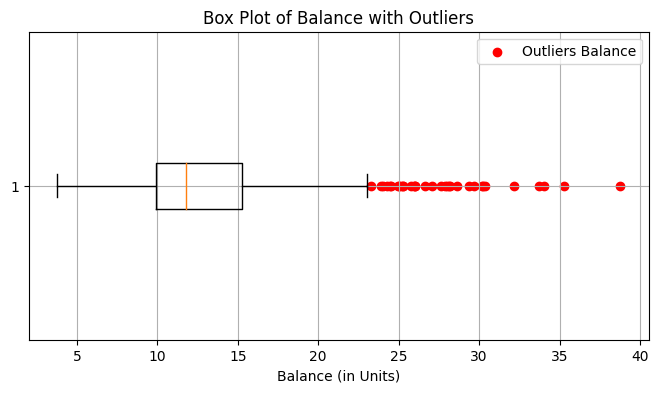

In [35]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['Balance'], vert=False, showfliers=False)  # Box plot without outliers
plt.scatter(outliers_balance['Balance'], [1] * len(outliers_balance), color='red', label='Outliers Balance', marker='o')
plt.title('Box Plot of Balance with Outliers')
plt.xlabel('Balance (in Units)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
outliers_income = identify_outliers(df, 'Income')
print("Outliers in 'Income' data:")
print(outliers_income)

Outliers in 'Income' data:
       Balance   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
3    27.652811  148.924   9504     681      3   36         11  Female      No   
28   35.271011  186.634  13414     949      2   41         14  Female      No   
32   26.039416  134.181   7838     563      2   48         13  Female      No   
41   25.291008  113.659   7659     538      2   66         15    Male     Yes   
66   22.781028  113.829   9704     694      4   38         13  Female      No   
85   29.370645  152.298  12066     828      4   41         12  Female      No   
103  29.707090  146.183   9540     682      6   66         15    Male      No   
121  30.261986  148.080   8157     599      2   83         13    Male      No   
128  26.032985  123.299   8376     610      2   89         17    Male     Yes   
174  26.634735  121.834  10673     750      3   54         16    Male      No   
184  27.976421  158.889  11589     805      1   62         17  Female      No   
1

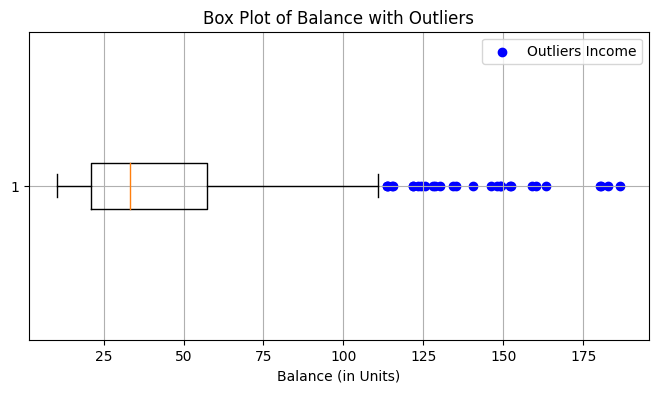

In [37]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['Income'], vert=False, showfliers=False)  # Box plot without outliers
plt.scatter(outliers_income['Income'], [1] * len(outliers_income), color='blue', label='Outliers Income', marker='o')
plt.title('Box Plot of Balance with Outliers')
plt.xlabel('Balance (in Units)')
plt.legend()
plt.grid(True)
plt.show()

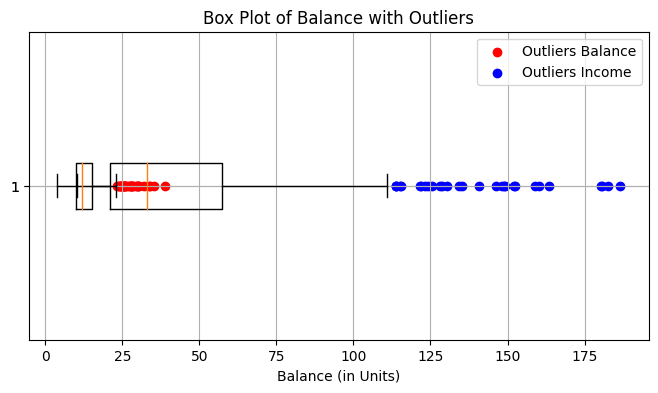

In [38]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['Balance'], vert=False, showfliers=False)  # Box plot without outliers
plt.scatter(outliers_balance['Balance'], [1] * len(outliers_balance), color='red', label='Outliers Balance', marker='o')
plt.boxplot(df['Income'], vert=False, showfliers=False)  # Box plot without outliers
plt.scatter(outliers_income['Income'], [1] * len(outliers_income), color='blue', label='Outliers Income', marker='o')
plt.title('Box Plot of Balance with Outliers')
plt.xlabel('Balance (in Units)')
plt.legend()
plt.grid(True)
plt.show()

Comparative Analysis: Boxplots are effective for comparing multiple datasets or groups within a dataset. They allow you to assess not only the presence of outliers but also how the outliers in different groups compare to one another. 

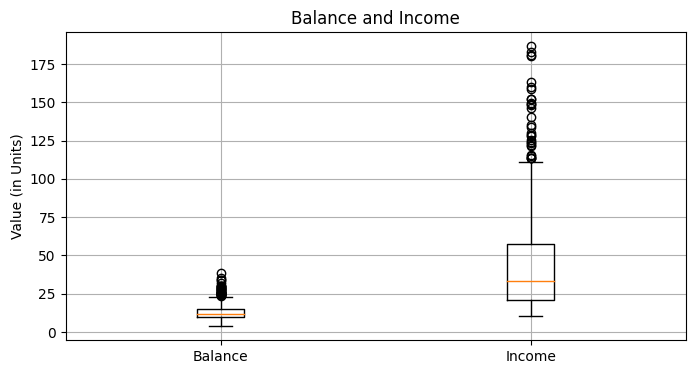

In [39]:
#box plot for Balance and Income side by side
plt.figure(figsize=(8, 4))
plt.boxplot([df['Balance'], df['Income']], labels=['Balance', 'Income'])
plt.title('Balance and Income')
plt.ylabel('Value (in Units)')
plt.grid(True)
plt.show()

In [40]:
# Create a new DataFrame called df_temp
# Copy the content of the original DataFrame df into df_temp
df_temp = pd.DataFrame()

# Define a list of column names to select from the original DataFrame
columns = ['Balance', 'Income', 'Limit', 'Rating']

# Update df_temp to contain only the columns specified in the 'columns' list
df_temp = df[columns]


In [41]:
df_temp[:5]

,Balance,Income,Limit,Rating
0,12.240798,14.891,3606,283
1,23.283334,106.025,6645,483
2,22.530409,104.593,7075,514
3,27.652811,148.924,9504,681
4,16.893978,55.882,4897,357


In [42]:
mean = df_temp.mean()
std = df_temp.std()
df_standardized = (df_temp - mean) / std

In [43]:
df_standardized[:5]

,Balance,Income,Limit,Rating
0,-0.209618,-0.860505,-0.489386,-0.464957
1,1.738175,1.725276,0.827225,0.827667
2,1.605367,1.684646,1.013518,1.028023
3,2.508907,2.942467,2.065853,2.107363
4,0.611157,0.302549,0.069925,0.013314


Standardization makes it easier to compare and interpret data across different features or variables. When the data in different columns have different units or scales, it can be challenging to compare them directly. Standardization brings all variables to a common scale, facilitating meaningful comparisons.

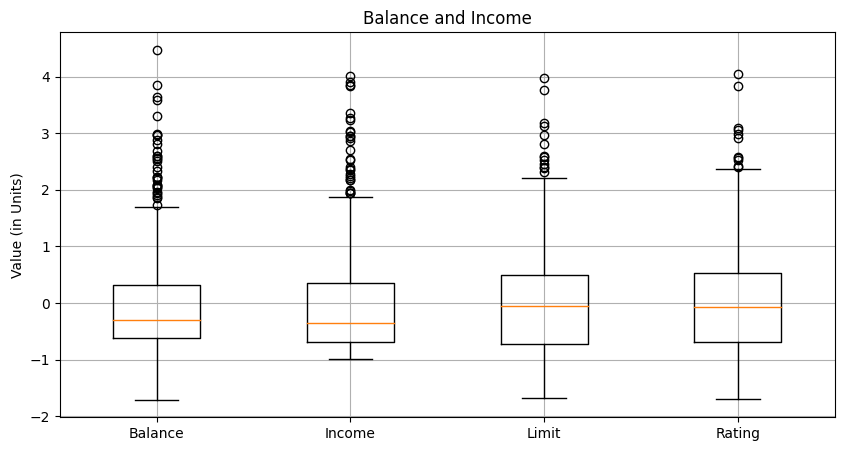

In [44]:
plt.figure(figsize=(10, 5))
plt.boxplot([df_standardized['Balance'], df_standardized['Income'], df_standardized['Limit'], df_standardized['Rating']], labels=['Balance', 'Income', 'Limit', 'Rating'])
plt.title('Balance and Income')
plt.ylabel('Value (in Units)')
plt.grid(True)
plt.show()

Now we can analysis the outlier and data distribution across columns, we can see that Balance and Income has highest amount of outlier and skewness. Similarly rating and limit has the least amount of outliers.

In [45]:
# Reverse the standardization
original_data = (df_standardized * std) + mean

In [46]:
original_data[:5]

,Balance,Income,Limit,Rating
0,12.240798,14.891,3606.0,283.0
1,23.283334,106.025,6645.0,483.0
2,22.530409,104.593,7075.0,514.0
3,27.652811,148.924,9504.0,681.0
4,16.893978,55.882,4897.0,357.0


In [47]:
import scipy.stats as stats

In [48]:
columns = original_data.columns
columns

Index(['Balance', 'Income', 'Limit', 'Rating'], dtype='object')

In [49]:
skewness_results = {}
#skewness for each column using a for loop
for i in columns:
    skewness = stats.skew(original_data[i])
    skewness_results[i] = skewness

In [50]:
print("Skewness for each column:")
for column, skewness in skewness_results.items():
    print(f"{column}: {skewness}")

Skewness for each column:
Balance: 1.5496878813095745
Income: 1.7355776476104643
Limit: 0.834349025161232
Rating: 0.8621449106556125


In [51]:
# skewness for all columns in the original_data DataFrame using Pearson's method
skewness_results = original_data.skew()
print("Skewness for each column (using Pearson's method):")
print(skewness_results)

Skewness for each column (using Pearson's method):
Balance    1.555527
Income     1.742117
Limit      0.837493
Rating     0.865394
dtype: float64


### Github: https://github.com/AnalyticalHarry
### YouTube: https://www.youtube.com/@AnalyticalHarry